In [1]:
import tensorflow as tf
from tensorflow import keras

In [4]:
fashion_mnist = keras.datasets.fashion_mnist

In [5]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [6]:
X_train.shape

(60000, 28, 28)

In [9]:
X_train, X_test = X_train/255., X_test/255.

In [11]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [22]:
import numpy as np
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [23]:
model = keras.models.Sequential([
                                 keras.layers.Flatten(input_shape=[28,28]),
                                 keras.layers.Dense(300, activation = "relu", kernel_initializer='he_uniform'),
                                 keras.layers.Dense(100, activation = "relu"),
                                 keras.layers.Dense(10, activation = "softmax")
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [24]:
model.compile(loss = "sparse_categorical_crossentropy",
              optimizer = "adam",
              metrics = ["accuracy"])

In [25]:
history = model.fit(X_train, y_train, batch_size = 32 , epochs = 30, validation_split=0.1)

Epoch 1/30
1688/1688 [==============================] - 5s 3ms/step - loss: 0.4854 - accuracy: 0.8253 - val_loss: 0.4000 - val_accuracy: 0.8532
Epoch 2/30
1688/1688 [==============================] - 5s 3ms/step - loss: 0.3667 - accuracy: 0.8649 - val_loss: 0.3579 - val_accuracy: 0.8725
Epoch 3/30
1688/1688 [==============================] - 5s 3ms/step - loss: 0.3274 - accuracy: 0.8780 - val_loss: 0.3607 - val_accuracy: 0.8702
Epoch 4/30
1688/1688 [==============================] - 5s 3ms/step - loss: 0.3026 - accuracy: 0.8877 - val_loss: 0.3345 - val_accuracy: 0.8790
Epoch 5/30
1688/1688 [==============================] - 5s 3ms/step - loss: 0.2869 - accuracy: 0.8928 - val_loss: 0.3172 - val_accuracy: 0.8853
Epoch 6/30
1688/1688 [==============================] - 5s 3ms/step - loss: 0.2690 - accuracy: 0.8981 - val_loss: 0.3260 - val_accuracy: 0.8798
Epoch 7/30
1688/1688 [==============================] - 5s 3ms/step - loss: 0.2561 - accuracy: 0.9036 - val_loss: 0.3306 - val_accuracy:

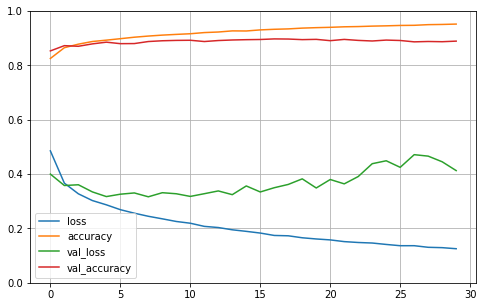

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [29]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 2ms/step - loss: 0.4416 - accuracy: 0.8896


[0.44155648350715637, 0.8895999789237976]

In [31]:
#y_pred = np.argmax(model.predict(X_test), axis = -1)

In [34]:
X_5 = X_test[:5]

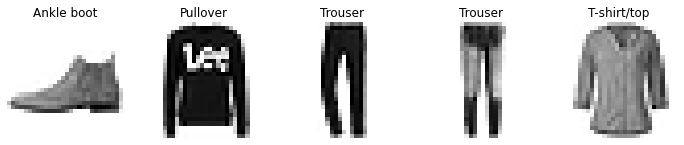

In [36]:
plt.figure(figsize=(12,2.4))
for index, image in enumerate(X_5):
  plt.subplot(1, 5, index+1)
  plt.imshow(image, cmap="binary", interpolation="nearest")
  plt.axis("off")
  plt.title(class_names[y_pred[index]], fontsize = 12)
plt.subplots_adjust(wspace = 0.2, hspace = 0.5)
plt.show()
